In [58]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


df = pd.read_csv('Spill_Incidents.csv')

#filtering dataframe by removing all unneeded columns
df1 = df.drop(['Program Facility Name','Street 1', 'Street 2','Locality', 
               'ZIP Code', 'SWIS Code', 'DEC Region', 'Waterbody', 'Spill Number', 
               'Received Date', 'Close Date', 'Units'], axis = 1)

#removing all rows with 'NaN'
df2 = df1.sort_values('Spill Date', ascending = False).dropna()

#removing all rows prior to 1985
df2 = df2[:-58]
df2 = df2.reset_index()
df2

,index,County,Spill Date,Contributing Factor,Source,Material Name,Material Family,Quantity,Recovered
0,21635,Onondaga,12/31/2020,Equipment Failure,Commercial/Industrial,gasoline,Petroleum,0.0,0.0
1,327901,Westchester,12/31/2020,Equipment Failure,Private Dwelling,#2 fuel oil,Petroleum,25.0,0.0
2,162073,Dutchess,12/31/2020,Equipment Failure,Commercial Vehicle,hydraulic oil,Petroleum,7.0,0.0
3,137134,Nassau,12/31/2020,Equipment Failure,Commercial/Industrial,#2 fuel oil,Petroleum,2.0,0.0
4,368207,Nassau,12/31/2020,Equipment Failure,Private Dwelling,#2 fuel oil,Petroleum,0.0,0.0
...,...,...,...,...,...,...,...,...,...
514107,431871,Richmond,01/01/1985,Other,Unknown,unknown material,Other,0.0,0.0
514108,467330,Kings,01/01/1985,Unknown,Unknown,unknown material,Other,0.0,0.0
514109,211206,Genesee,01/01/1985,Tank Failure,Commercial/Industrial,gasoline,Petroleum,0.0,0.0
514110,471686,Nassau,01/01/1985,Unknown,Unknown,unknown petroleum,Petroleum,0.0,0.0


[Text(0.5, 0, 'County'),
 Text(0, 0.5, 'Number of Chemical Spills'),
 Text(0.5, 1.0, 'Top 10 Counties with Most Spills')]

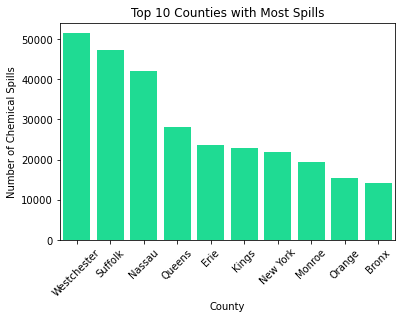

In [51]:
#counting number of reoccurances per unique item (county)
county = df2['County'].value_counts()

#bar graph using top 10 counties
barcounty = sb.barplot(x = county.index[:10], y = county.head(10), color = 'mediumspringgreen')
barcounty.set_xticklabels(barcounty.get_xticklabels(), rotation=45) #Rotate xlabel for legibilaty
barcounty.set(xlabel = 'County', ylabel = 'Number of Chemical Spills', title = 'Top 10 Counties with Most Spills')

In [59]:
county

Westchester                                51535
Suffolk                                    47189
Nassau                                     41954
Queens                                     28083
Erie                                       23714
                                           ...  
Oil Springs Indian Reservation                 1
Canada - Region 5                              1
Connecticut - Region 4                         1
St. Regis Indian Reservation - Region 5        1
Shinnecock Indian Reservation                  1
Name: County, Length: 86, dtype: int64

[Text(0.5, 0, 'Material Family'),
 Text(0, 0.5, 'Number of Chemical Spills'),
 Text(0.5, 1.0, 'Top Spilled Materials by Family')]

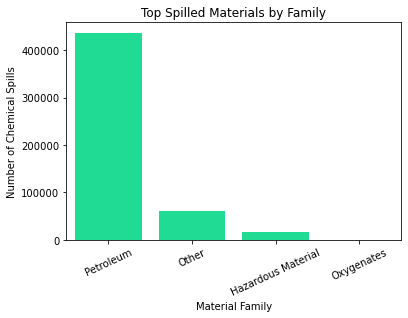

In [17]:
#number of occurances
materialfamily = df2['Material Family'].value_counts()

#Top 5 material families
barmf = sb.barplot(x=materialfamily.index[:5], y = materialfamily.head(), color = 'mediumspringgreen')
barmf.set_xticklabels(barmf.get_xticklabels(), rotation=25) #Rotate xlabel for legibilaty
barmf.set(xlabel = "Material Family", ylabel = "Number of Chemical Spills", title = "Top Spilled Materials by Family")

[Text(0.5, 0, 'Material Name'),
 Text(0, 0.5, 'Number of Chemical Spills'),
 Text(0.5, 1.0, 'Top Spilled Materials by Name')]

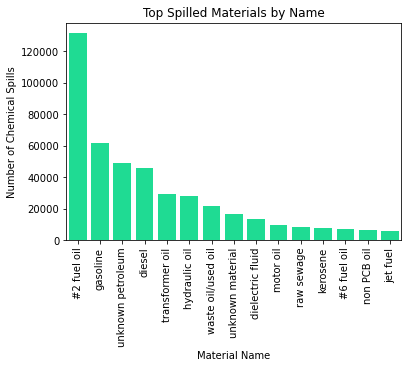

In [49]:
#number of occurances
materialname = df2["Material Name"].value_counts()

#top 15 materials by name
barmn = sb.barplot(x = materialname.index[:15], y = materialname.head(15), color = 'mediumspringgreen')
barmn.set_xticklabels(barmn.get_xticklabels(), rotation=90) #Rotate xlabel for legibilaty
barmn.set(xlabel = 'Material Name', ylabel = 'Number of Chemical Spills', title = 'Top Spilled Materials by Name')

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Spills'),
 Text(0.5, 1.0, 'Trend of Number of Spills from 1985 - 2021')]

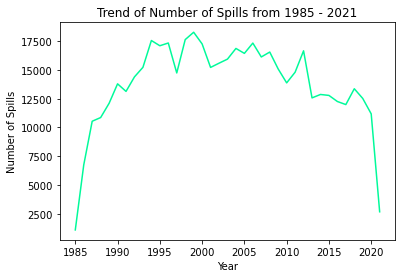

In [35]:
#Spill Date is in MM/DD/YYYY format, however this does not organize items well enough - Isolating to only YYYY
count_list = []
year_list = []
i = 0
for i in range(37): #range of 36 years from 1985-2021
    year = 1985 + i
    year_list.append(year)
    index_df = df2['Spill Date'].str.contains(str(year)) #extracing specific years
    newdf = df2.loc[index_df]
    count_list.append(len(newdf)) #appending years with number of spills per year
    i += 1

#number of spills per year from 1985-2021
lineyear = sb.lineplot(x = year_list, y = count_list, color = "mediumspringgreen")
lineyear.set(xlabel = "Year", ylabel = 'Number of Spills', title = 'Trend of Number of Spills from 1985 - 2021')


[Text(0.5, 0, 'Cause of Spill'),
 Text(0, 0.5, 'Number of Chemical Spills'),
 Text(0.5, 1.0, 'Top Causes of Spills')]

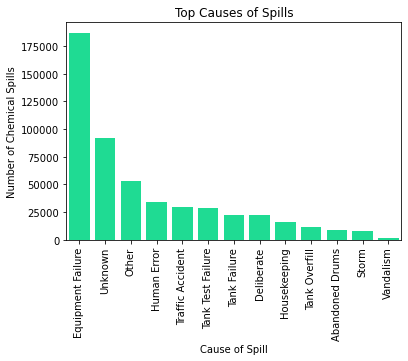

In [11]:
#number of reoccurances
factor = df2['Contributing Factor'].value_counts()

#Top 13 spill causes
barfactor = sb.barplot(x = factor.index[:13], y = factor.head(13), color = 'mediumspringgreen')
barfactor.set_xticklabels(barfactor.get_xticklabels(), rotation=90) #Rotate xlabel for legibilaty
barfactor.set(xlabel = 'Cause of Spill', ylabel = 'Number of Chemical Spills', title = 'Top Causes of Spills')

[Text(0.5, 0, 'Source of Spill'),
 Text(0, 0.5, 'Number of Spills'),
 Text(0.5, 1.0, 'Top Source of Spills')]

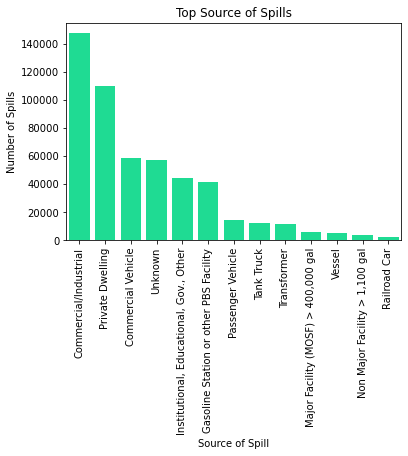

In [41]:
#number of occurances
source = df2['Source'].value_counts()

#Top 13 spill sources
barsource = sb.barplot(x = source.index[:13], y = source.head(13), color = 'mediumspringgreen')
barsource.set_xticklabels(barsource.get_xticklabels(), rotation=90) #Rotate xlabel for legibilaty
barsource.set(xlabel = 'Source of Spill', ylabel = 'Number of Spills', title = 'Top Source of Spills')

In [47]:
#summation of quantity column
quantity = df2['Quantity'].sum()
print("Total Number of Spilled Chemicals from 1985-2021")
print(quantity, '\n')

#summation of recovered column
recovered = df2['Recovered'].sum()
print("Total Number of Recovered Chemical Spillage from 1985-2021")
print(recovered, '\n')

#difference of quantity and recovered
print("Total Number of Non-Recovered Spillage")
print(quantity - recovered)

Total Number of Spilled Chemicals from 1985-2021
101139970220.8 

Total Number of Recovered Chemical Spillage from 1985-2021
243350045.44999996 

Total Number of Non-Recovered Spillage
100896620175.35
